# Loan Prediction 
By: Jomaica L.

#### Table of Contents
    1.1 Data Exploration
    1.2 Distribution Analysis
    1.3 Categorical Variable Analysis

    2.1 Data Wrangling
    2.2 Check for Missing Values
    2.3 Fill in Missing Values
    2.4 Treat Extreme Values
    2.5 Impute the rest of the Missing Values for all variables.
    
    3.1 ML Models
    3.2 Logistic Regression
    3.3 Decision Trees
    3.4 Random Forest

In [599]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib as plt

# import csv file into a df
df = pd.read_csv("train_dataset.csv")

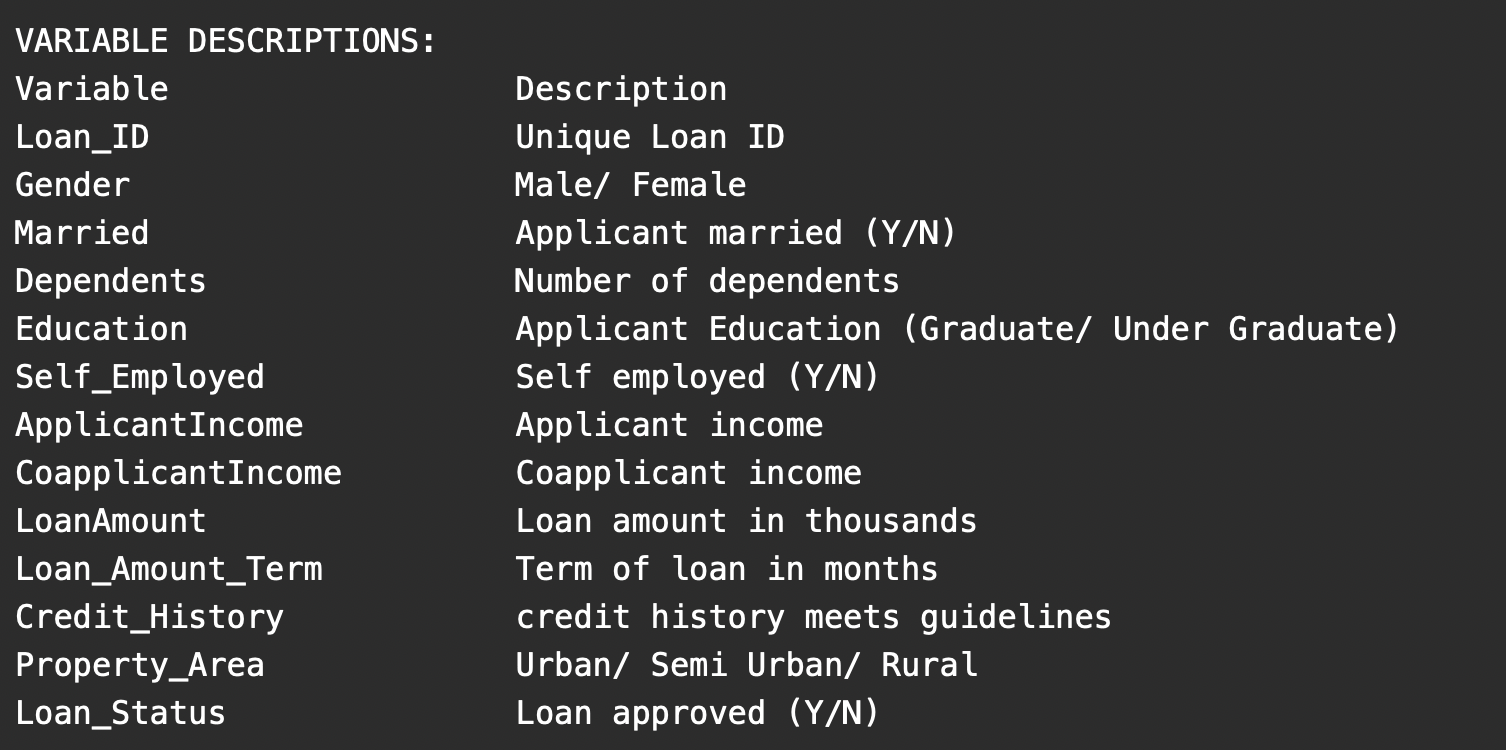

### 1.1 Quick Data Exploration

In [229]:
# look at a few top rows using head() 
df.head(10) # ---> This should print 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [230]:
# look at summary statistics such as count, mean, std, min, quartiles, max and output using describe().
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [247]:
# look at discrete values such as Propety_Area and Credit_History
# Propety_Area = 3 different class
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [235]:
# Credit_History = 2 class (1 for those with CH, 0 otherwise.)
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [236]:
# check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Old_LS                0
Loan_Status           0
dtype: int64

### 1.2 Distribution Analysis

<AxesSubplot:>

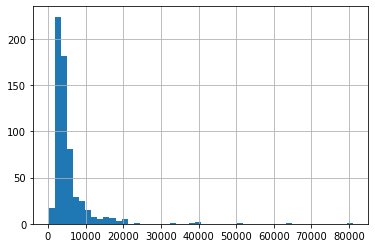

In [237]:
# plot distribution of variables: ApplicantIncome
df['ApplicantIncome'].hist(bins=50)

From the histogram above, we can conclude that there are a few outliers which is why we used 50 bins to see the distribution clearly. 

Next, we can use boxplots to understand the distributions better.

<AxesSubplot:>

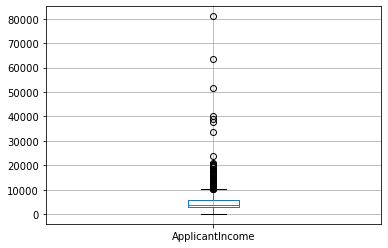

In [238]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

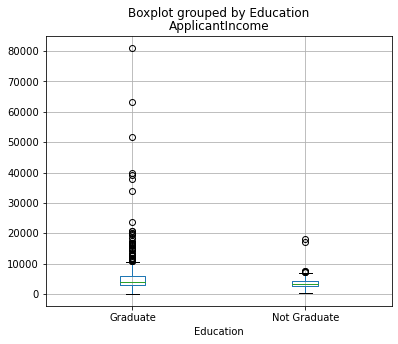

In [239]:
df.boxplot(column='ApplicantIncome', by = 'Education', figsize=(6, 5))

From the plot, we can see that there is no substantial difference between the mean of income of graduates and non-graduates. However, there is clearly a higher number of graduates with very high income > 30K and this is observed to be the outliers.

<AxesSubplot:>

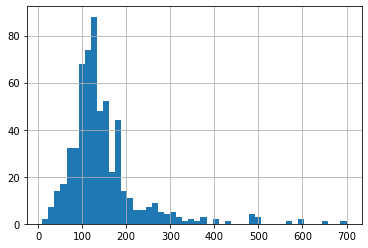

In [240]:
# plot distribution of variables: LoanAmount
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

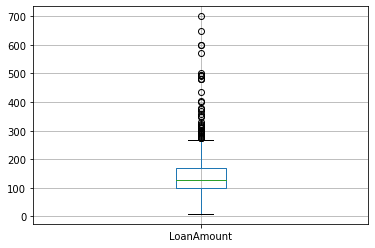

In [241]:
df.boxplot(column='LoanAmount')

Again, there are alot of outliers. Clearly, both variables ApplicantIncome and LoanAmount require some amount of data wrangling. 

By now, we can conclude that the LoanAmount has a few missing values as well as fewer outliers compared to ApplicantIncome - which means that we need more deeper analysis for the last variable (ApplicantIncome).

### 1.3 Categorical Variables Analysis

Now that we've analyzed the distributions for both ApplicantIncome and LoanAmount, we can start to look at categorical variables in this dataset. 

In [413]:
# Lets look at Credit_History and Loan_Status using pivot_table or groupby if need be.
# Objective: We're looking for a connection whether credit history affects the probability of getting a loan.

a = df['Credit_History'].value_counts(ascending=True)
b = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())


print('\nFrequency Table for Credit History: ')
print(a)

print('\nProbability of getting a loan for each Credit History class: ')
print(b)


Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting a loan for each Credit History class: 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


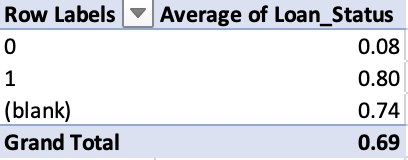

In Excel, we can check this average by using pivot table and converting the Loan_Status class to Y = 1 and N = 0.

Based on the Probability of getting a loan for each Credit History class, we can see that our numbers are somewhat close to the calculated avarage in Excel.

<AxesSubplot:title={'center':'Probability of getting a loan by Credit_History'}, xlabel='Credit_History', ylabel='Probability of getting a loan'>

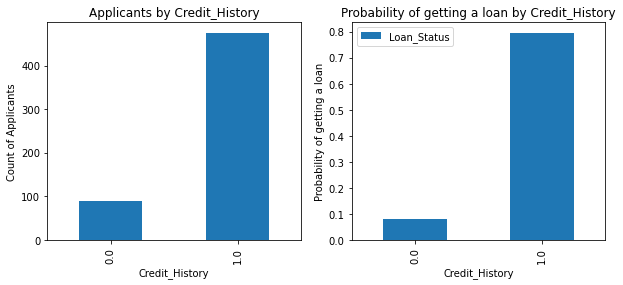

In [471]:
import matplotlib.pyplot as plt

# Subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# add CV in the plot
a.plot.bar(ax = axes[0],
          xlabel = 'Credit_History',
          ylabel = 'Count of Applicants',
          title = 'Applicants by Credit_History')

b.plot.bar(ax=axes[1],
          xlabel = 'Credit_History',
          ylabel = 'Probability of getting a loan',
          title = 'Probability of getting a loan by Credit_History')

Based on the graph, we can see that the probablity of getting a loan if the applicant has a valid Credit History are eight-fold.

<AxesSubplot:xlabel='Credit_History'>

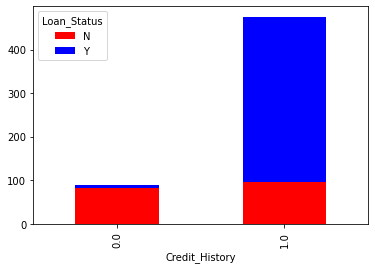

In [445]:
c = pd.crosstab(df['Credit_History'], df['Loan_Status'])
c.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Based on the graph above, we can see that the Credit_History with class 0 being No and 1 being Yes, there is higher probability that Loan_Status will get approved if the applicant has a valid Credit_History.

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

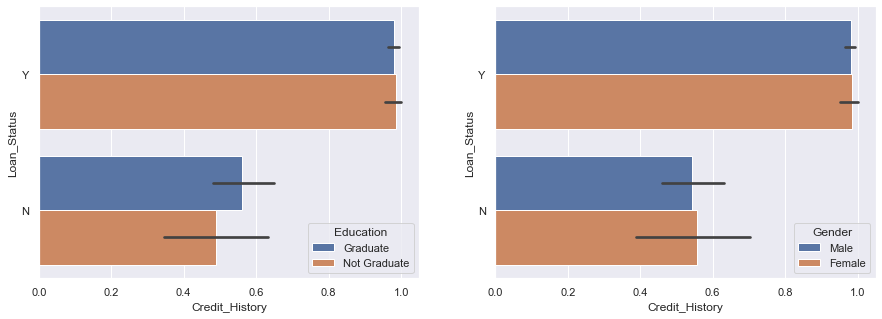

In [506]:
# Classification: Lets look at Gender and Education together. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Define rows (1 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize = (15,5))

# Plot the axes
sns.barplot(data=df, x='Credit_History', y='Loan_Status', hue='Education', ax=axes[0])
sns.barplot(data=df, x='Credit_History', y='Loan_Status', hue='Gender', ax=axes[1])

**Conclusion**: We have just done a classification for the two variables mentioned (Gender & Education) which determines whether this affects our dependent variable (Loan_Status). Based on this graph, there is a clear trend that applicants with a valid Credit History with 0 being None and 1 being Yes, they are likely to be approved for a loan regardless of their Gender or Education. However, in terms of not having a valid Credit_History, the applicants have a lower chance of getting approved for loans. Moreover, the data shows that applicants who Graduated and a Female even those with no valid Credit_History can still have a chance of getting approved for a loan. 

### 2.1 Data Wrangling

We know that from our Data Exploration, we had a few missing values which could be a problem so we need to solve this before we do any ML models.

Here are a few problems that we encountered:

* There were 50 missing values in `Credit_History` so it needs to be estimated wisely as well as the importance of the variable.
* We used `Gender` for our classification and it looks like there are 13 missing values.
* `LoanAmount` and `ApplicantIncome` also needs deeper understanding due to the outliers observed in the Distrubution Analysis. 
* In addition, we can also look at these non-numerical variables `Dependents`, `Education`, `Property_Area`, and `Married` to see if they are of any importance. 


### 2.2 Check for Missing Values

In [584]:
# check for missing values again
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now, since `LoanAmount` is a numerical value, we can use regression to check whether other variables could predict that amount. We will use `Self_Employed` and `Education` to see whether the applicants who Graduated and Employed combined can give a good estimate of Loan Amount.

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Education, Self_Employed]'>

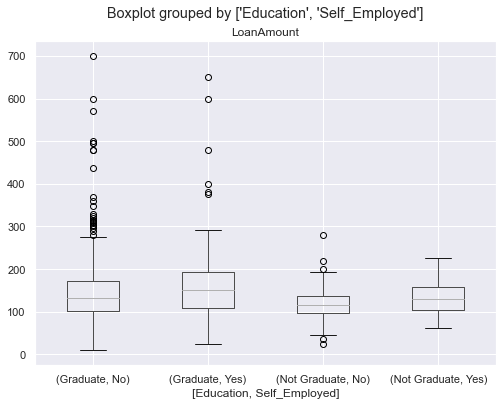

In [529]:
# first lets look at a boxplot to see if any trends exists
df.boxplot(column='LoanAmount', by = ['Education','Self_Employed'], figsize =(8,6))

In the figure, we can see some variations in the median of LoanAmount for each group and this can be used to assign the values. But first, we need to make sure that `Self_Employed` and `Education` does not have any missing values.

We know that Education has 0 missing values but Self Employed has 32. We can look at its frequency table:

In [619]:
# do this first to count values before filling in missing values
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

To calculate the probability of No's, divide the frequency by the total number of results and multiply by 100 
----> (500/582) * 100 = 86%

Hence, ~86% values are "No" in the `Self_Employed` variable. It's safe to assume that those 32 missing values are "No" as there is a high probability of success. 

### 2.3 Fill in Missing Values

In [611]:
# fill in missing values for Loan_Amount (You can do this by this code or the last code)
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# replace missing values for Loan_Amount
#df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(func, axis=1), inplace=True)

In [605]:
# impute 32 missing values into No
df['Self_Employed'].fillna('No',inplace=True)

Now, let's create a Pivot table which provides us median values for all the groups of unique values of `Self_Employed` and `Education` features. Next, we define a function, which returns the values of these cells and apply it to fill the 22 missing values of `LoanAmount`:

In [616]:
# check if Self_Employed and Education still has any missing values.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [607]:
# find the median
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [608]:
# define a function to return the value of this Pivot Table
def func(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [609]:
# replace missing values for Loan_Amount
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(func, axis=1), inplace=True)

NOTE: This method will work only if you have not filled the missing values in Loan_Amount variable using the previous approach, i.e. using mean.

### 2.4 Treat Extreme Values (LoanAmount and ApplicantIncome)

Since we have a skewed distrubition for `LoanAmount` and `ApplicantIncome`, we can try to use log transformation to get closer to a normality.

First, lets analyze LoanAmount first since extreme values are practically possible. (i.e. considering that some applicants might apply for a higher loan value due to specific needs.) In this case, instead of treating them as outliers we can use the **log transformation** to nullify their effect:

<AxesSubplot:>

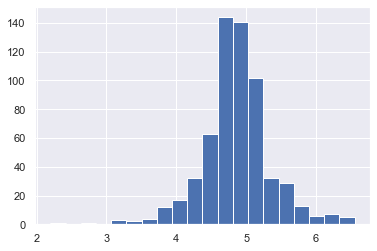

In [613]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now, the distribution looks much closer to normal and extreme values are also significantly subsided. 

Second is ApplicantIncome. Lets assume that some applicants might have lower income but have strong Co-applicants hence we can combine both variables as total income as well as take log transformation of the same.

<AxesSubplot:>

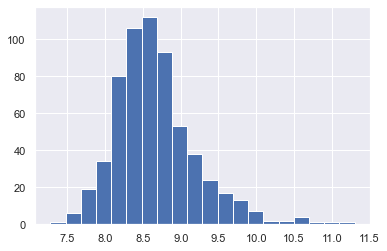

In [615]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

We can conclude that the distrubition is much better for both graphs compared to the previous one.

### 2.5 Impute the rest of the Missing Values for all variables. 
`Gender`, `Married`, `Dependents`, `Loan_Amount_Term`, `Credit_History`

(*This step is imperative before starting any ML learning models.*)

In [617]:
# First, lets check for missing values again.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

Lets start with Gender but first lets count the values before filling in any missing values. 

**a. Gender**

In [620]:
# count the values for Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

We know that Gender has 13 missing values but we need to calculate the probability of Male. 

To calculate the probability, divide the frequency by the total number of results and multiply by 100 ----> 

    Male :(489/601) * 100 = 81% 
    Female: (112/601) * 100 = 18.6%

Hence, ~81% values are "Male" in the Gender variable. It's safe to assume that those 13 missing values are "Male" as there is a high probability of success.

In [623]:
# lets impute those 13 missing values for Gender as Male
df['Gender'].fillna('Male',inplace=True)

**b. Married**

In [624]:
# count the values for Married 
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

We have 3 missing values for Married. 

    Yes: (398/611) * 100 = 65%
 
Hence, ~65% values are "Yes" in the Married variable. So, its safe to assume that those 3 missing values are "Yes".

In [625]:
# lets impute those 3 missing values for Married as Yes
df['Married'].fillna('Yes',inplace=True)

**c. Dependents**

In [627]:
# count the values for Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Dependents has 15 missing values. 

    0: (345/599) * 100 = 57.6%

We can see that the highest rate of success is ~57.6% which is safe to assume that those 15 missing values are applicants with "0" dependents. 

In [628]:
# lets impute those 15 missing values as 0
df['Dependents'].fillna('0',inplace=True)

**d. Loan_Amount_Term**

In [629]:
# count the values for Loan_Amount_Term
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

This variable has 14 missing values. 

    360 months = 30 Years: (512/600) * 100 = 85%
    
Hence, the probability of success is ~85%. Its safe to assume that those missing values for this variable are "360" months of Loan Term. 

In [630]:
# lets impute those 14 missing values as 360
df['Loan_Amount_Term'].fillna('360',inplace=True)

**e. Credit_History**

In [631]:
# count the values for Credit_History
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

We know that Credit_History class is 1 = Yes, 0 = No. We also know that there are 50 missing values for this variable.

    1.0 = Yes: (475/564) * 100 = 84%

Hence, it is safe to assume that these 50 missing values for Credit_History are "1.0" since there is an ~84% success rate. 

In [632]:
# lets impute those 50 missing values as "1.0" 
df['Credit_History'].fillna('1.0',inplace=True)

Now that were all done, we can try to see if there are still any missing values before we move on to building a predictive model.

In [633]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

Looks like everything is all cleaned :-) 

However, we need to add one more column at the end for LoanAmount/TotalIncome which will give an idea of how well the applicant can pay back his loan.

In [640]:
# lets add LoanAmount/TotalIncome into a new column
df['LoanAmount/TotalIncome'] = (df.LoanAmount/df.TotalIncome)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,LoanAmount/TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026,0.022226
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466,0.024483
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205,0.009742
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456,0.030438
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664,0.024660


Now we can start working on our ML models.

### 3.1 Building a Predictive Model

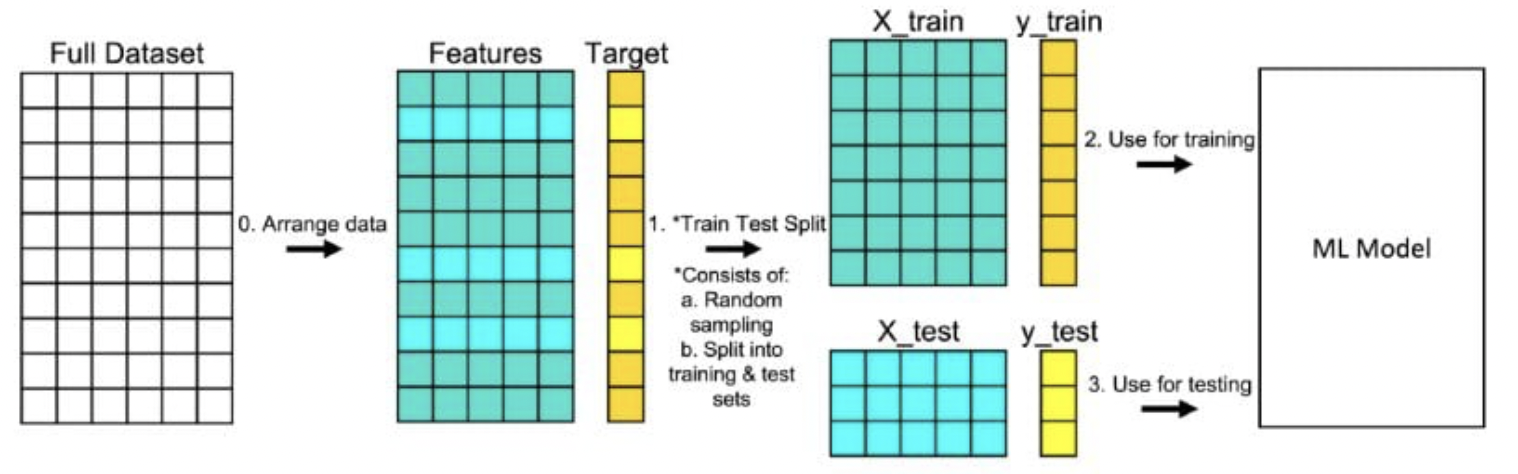

After weve done our Data Exploration and Data Wrangling, we can finally create a predictive model on our train data set. 

Usually, we would build models by splitting dataset into train/test. 

`80% for training, and 20% for testing.`

You train the model using the training set. You test the model using the testing set.
       
`Train the model means create the model.`

`Test the model means test the accuracy of the model.`

Skicit-Learn (**sklearn**) is the most commonly used library in Python for this purpose and we will follow the trail. Since Skicit-Learn requires all input to be numeric, we can convert all of our categorical variables into numeric by encoding the categories. But before that, we will fill all the missing values in the dataset. (If you havent done so, then you can also use the short code below, but since we've done this step from the previous one, theres no need to use this)

In [643]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [645]:
# now we can convert our Categorical Var into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    
df.dtypes

Loan_ID                    object
Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term           object
Credit_History             object
Property_Area               int64
Loan_Status                 int64
LoanAmount_log            float64
TotalIncome               float64
TotalIncome_log           float64
LoanAmount/TotalIncome    float64
dtype: object

Next, we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

For more info on cross validation: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/.

In [671]:
# Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [683]:
# Define a generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]

    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
  
  
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function: 
  model.fit(data[predictors],data[outcome])

### 3.2 Logistic Regression

**Logistic Regression** is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. To represent binary/categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

We can start with a hypothesis assuming that the chances of getting a loan will be higher for: 

1. Applicants having a credit history (remember we observed this in data exploration?)
2. Applicants with higher income applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

**1st Model: `Credit_History`**

In [717]:
# lets make our first classification model with Credit_History
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [722]:
#We can try different combination of variables:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [721]:
#We can try another combination of variables:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','ApplicantIncome','CoapplicantIncome']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.270%
Cross-Validation Score : 79.158%


Generally we expect the accuracy to increase on adding variables especially on the second combination of variables but this is a more challenging case. The accuracy and cross-validation score are not getting impacted by less important variables. However, on the second combination of variables used, we see an increase in Accuracy and a decrease in CV. So, `Credit_History, Education, ApplicantIncome, CoapplicantIncome` is dominating the mode. Hence,  We have two options now:

1. **Feature Engineering:** dereive new information and try to predict those. 
2. **Feature Selection:** deciding which feature to use. Lets explore this first.
3. Better modeling techniques. Let’s explore this next.

### Feature Selection

In [748]:
# x = input features ---> Credit_History, Education, ApplicantIncome, CoapplicantIncome, Married, Self_Employed, Property_Area
# y = target feature ---> Loan_Status
feature_selection = df[['Credit_History', 'Education','ApplicantIncome', 'CoapplicantIncome','Married','Self_Employed','Property_Area','Loan_Status']]
feature_selection

,Credit_History,Education,ApplicantIncome,CoapplicantIncome,Married,Self_Employed,Property_Area,Loan_Status
0,1.0,0,5849,0.0,0,0,2,1
1,1.0,0,4583,1508.0,1,0,0,0
2,1.0,0,3000,0.0,1,1,2,1
3,1.0,1,2583,2358.0,1,0,2,1
4,1.0,0,6000,0.0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,1.0,0,2900,0.0,0,0,0,1
610,1.0,0,4106,0.0,1,0,0,1
611,1.0,0,8072,240.0,1,0,2,1
612,1.0,0,7583,0.0,1,0,2,1


In [749]:
# lets look at the correlation
print(feature_selection.corr())

                   Education  ApplicantIncome  CoapplicantIncome   Married  \
Education           1.000000        -0.140760          -0.062290  0.012304   
ApplicantIncome    -0.140760         1.000000          -0.116605  0.051708   
CoapplicantIncome  -0.062290        -0.116605           1.000000  0.075948   
Married             0.012304         0.051708           0.075948  1.000000   
Self_Employed      -0.010383         0.127180          -0.016100  0.004489   
Property_Area      -0.065243        -0.009500           0.010522  0.004257   
Loan_Status        -0.085884        -0.004710          -0.059187  0.091478   

                   Self_Employed  Property_Area  Loan_Status  
Education              -0.010383      -0.065243    -0.085884  
ApplicantIncome         0.127180      -0.009500    -0.004710  
CoapplicantIncome      -0.016100       0.010522    -0.059187  
Married                 0.004489       0.004257     0.091478  
Self_Employed           1.000000      -0.030860    -0.003700

In [750]:
# Apply filter methods 
cor = feature_selection.corr()

# Pearson method
feature_selection.corr(method ='pearson')

,Education,ApplicantIncome,CoapplicantIncome,Married,Self_Employed,Property_Area,Loan_Status
Education,1.000000,-0.140760,-0.062290,0.012304,-0.010383,-0.065243,-0.085884
ApplicantIncome,-0.140760,1.000000,-0.116605,0.051708,0.127180,-0.009500,-0.004710
CoapplicantIncome,-0.062290,-0.116605,1.000000,0.075948,-0.016100,0.010522,-0.059187
Married,0.012304,0.051708,0.075948,1.000000,0.004489,0.004257,0.091478
Self_Employed,-0.010383,0.127180,-0.016100,0.004489,1.000000,-0.030860,-0.003700
Property_Area,-0.065243,-0.009500,0.010522,0.004257,-0.030860,1.000000,0.032112
Loan_Status,-0.085884,-0.004710,-0.059187,0.091478,-0.003700,0.032112,1.000000


<AxesSubplot:>

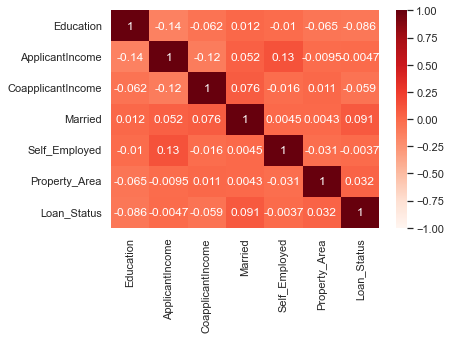

In [751]:
# lets vizualize the correlation heatmap
cor = feature_selection.corr()

sns.heatmap(cor,annot=True,cmap=plt.cm.Reds, vmax=1, vmin=-1) 

NOTE: We want the features to be as close to 1 as possible. 

### Feature Selection by Covariance

Calculate the Pearson correlation coefficients and select the best two features using the correlation results.

In [752]:
# Correlation Coefficient with the target value (Loan_Status)
cor_T = abs(cor['Loan_Status'])

print(cor_T)

Education            0.085884
ApplicantIncome      0.004710
CoapplicantIncome    0.059187
Married              0.091478
Self_Employed        0.003700
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


From the above correlation result, we don't have a good feature since they are all < 1. In this case, we can try other possible modeling techniques. (Decision Trees, Random Forest)

### 3.3 Decision Trees

Decision trees is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. It is known to provide higher accuracy than logistic regression model.

In [770]:
from sklearn.tree import DecisionTreeClassifier
# were using categorical variables for this example
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


We can see that Credit_History will always dominate other categorical variables hence it is unable to produce any impact.

Lets try numerical variables:

In [777]:
# were using numerical variables for this example
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.536%


Here we observed that although the accuracy went up on adding a few numerical variables, but the cross-validation error went down. This is the result of model over-fitting the data. 

### 3.4 Random Forest

This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.

One of benefits of Random forest is the power to handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. 

Furthermore, the model outputs importance of variables, which can be a very handy feature too when it comes to selecting the best feature (on some random data set).

In [772]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
                 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
                 'LoanAmount_log','TotalIncome_log']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.530%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

1. Reducing the number of predictors
2. Tuning the model parameters

We can try both of these. First lets see the feature selection matrix from which we will take the most important features. 

In [762]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
featimp

Credit_History      0.272591
TotalIncome_log     0.267324
LoanAmount_log      0.226110
Property_Area       0.051392
Dependents          0.048426
Loan_Amount_Term    0.042360
Married             0.026238
Education           0.022136
Self_Employed       0.021995
Gender              0.021428
dtype: float64

In [764]:
# Now lets use the top 5 variables
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)

predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Property_Area', 'Dependents']

classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.388%
Cross-Validation Score : 80.784%


Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in slight variations because of randomization. But the output should stay in the ballpark.